# Python Notebook for Analysing Benchmark Results of the K-Priority Queue benchmark

## Imports and Parameters

In [31]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
frequencies = [1200000, 1500000, 2000000, 2500000, 2800000]
cores = [1, 8, 16, 24, 32]

In [33]:
metrics = ['benchmark', 'cores', 'throughput', 'frequency', 'power']
metrics_bench = ['benchmark', 'cores', 'throughput']
metrics_power = ['power']

In [34]:
dataframe = pd.DataFrame(columns = metrics)

## Creating the Dataframe

We create a dataframe containing all of the results obtained after running the benchmarks, sorted by the benchmark name, cores, and the frequency.

In [35]:
for frequency in frequencies:
    for core in cores:
        dataframe = pd.concat([dataframe, pd.read_csv("./klsm/results/{freq}/results_{cores}.csv".format(
                    freq = frequency, 
                    cores = core
                ), names = metrics_bench).assign(frequency = frequency)], ignore_index= True, sort= True)
        avg_power = pd.read_csv("./klsm/results/{freq}/power_{cores}.csv".format(
                    freq = frequency, 
                    cores = core
                ), names = metrics_power, index_col= False).mean().mean()
        dataframe.fillna(avg_power, inplace = True)

In [36]:
dataframe['efficiency'] = dataframe['throughput']/dataframe['power']
dataframe.sort_values(by = metrics_bench, inplace = True)
dataframe.reset_index(drop = True)

,benchmark,cores,frequency,power,throughput,efficiency
0,klsm128,1,1200000,105.239227,4243749,40324.783001
1,klsm128,1,1200000,105.239227,4273766,40610.009345
2,klsm128,1,1200000,105.239227,4276790,40638.743877
3,klsm128,1,1200000,105.239227,4277757,40647.932466
4,klsm128,1,1200000,105.239227,4279924,40668.523647
...,...,...,...,...,...,...
245,klsm256,32,2800000,218.917923,196992192,899844.970665
246,klsm256,32,2800000,218.917923,198563302,907021.678622
247,klsm256,32,2800000,218.917923,199977867,913483.301228
248,klsm256,32,2800000,218.917923,200345082,915160.710711


## (Optional) Saving the Dataframe to a CSV File

In [37]:
# Uncomment the below line to save results to a CSV file

#dataframe.to_csv('klsm_results.csv', sep = ',')

## Create a Grouped Dataframe

In [38]:
stats = ['mean', 'min', 'max', 'median']

In [39]:
grouped_dataframe = dataframe.groupby(['benchmark', 'cores', 'frequency', 'power']).aggregate({'throughput': stats, 'efficiency': stats})

In [40]:
grouped_dataframe.reset_index(inplace = True)

In [11]:
#rename columns for better visibility and splitting
grouped_dataframe.columns = ['benchmark', 'cores', 'frequency', 'power', 'throughput_mean', 'throughput_min', 'throughput_max', 'throughput_median',
                            'efficiency_mean', 'efficiency_min', 'efficiency_max', 'efficiency_median']

In [12]:
grouped_dataframe = grouped_dataframe[['benchmark', 'cores', 'frequency', 'power', 'throughput_median']]

Taking the median throughput for analysis since it is not affected by outliers

The performance per watt numbers are highest for 32 cores at 2.8GHz for the klsm256 benchmark and highest for 32 cores at 2.5 GHz for the klsm128 benchmark.

## Plotting

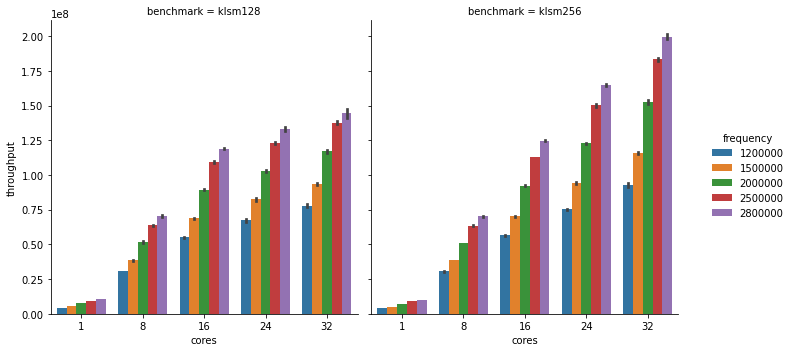

In [44]:
sns.catplot(x = 'cores',
            y = 'throughput',
            hue = 'frequency',
            data = dataframe,
            kind = 'bar',
            legend = True,
            margin_titles= True,
            col = 'benchmark')

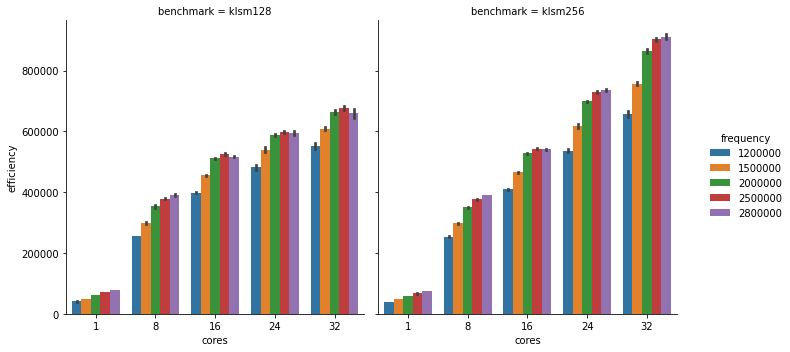

In [45]:
sns.catplot(x = 'cores',
            y = 'efficiency',
            hue = 'frequency',
            data = dataframe,
            kind = 'bar',
            legend = True,
            margin_titles= True,
            col = 'benchmark')

### We can see that for the klsm256 benchmark, 32 cores with max 2800MHz frequency yields the maximum efficiency, while klsm128 with 32 cores at 2500MHz has the highest efficiency.